In [6]:
from pandas import *
import numpy as np
import seaborn as sb

In [7]:
df = read_csv("C:\\Users\\Наташа\\Desktop\\Лекции (Аналитик данных)\\Итоговая работа\\home_price.csv")

In [ ]:
df = df.rename(columns={'last_price': 'Цена на момент снятия с публикации', 'total_area': 'Площадь квартиры (м²)', 'rooms': 'Число комнат', 'ceiling_height': 'Высота потолков (м)', 'floors_total': 'Всего этажей в доме', 'living_area': 'Жилая площадь в квадратных метрах(м²)', 'floor': 'Этаж', 'is_apartment': 'Апартаменты (булев тип)', 'studio': 'Квартира-студия (булев тип)', 'open_plan': 'Свободная планировка (булев тип)', 'kitchen_area': 'Площадь кухни в квадратных метрах (м²)', 'balcony': 'Число балконов', 'airports_nearest': 'Расстояние до ближайшего аэропорта(м)', 'cityCenters_nearest': 'Расстояние до центра города (м)', 'parks_around3000': 'Число парков в радиусе 3 км', 'parks_nearest': 'Расстояние до ближайшего парка (м)', 'ponds_around3000': 'Число водоёмов в радиусе 3 км', 'ponds_nearest': 'Расстояние до ближайшего водоёма (м)'})
df

,Цена на момент снятия с публикации,Площадь квартиры (м²),Число комнат,Высота потолков (м),Всего этажей в доме,Жилая площадь в квадратных метрах(м²),Этаж,Апартаменты (булев тип),Квартира-студия (булев тип),Свободная планировка (булев тип),Площадь кухни в квадратных метрах (м²),Число балконов,Расстояние до ближайшего аэропорта(м),Расстояние до центра города (м),Число парков в радиусе 3 км,Расстояние до ближайшего парка (м),Число водоёмов в радиусе 3 км,Расстояние до ближайшего водоёма (м)
0,13000000.0,108.00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0
1,3350000.0,40.40,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN
2,5196000.0,56.00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0
3,64900000.0,159.00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0
4,10000000.0,100.00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,24665.0,4232.0,1.0,796.0,3.0,381.0
23695,3100000.0,59.00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23696,2500000.0,56.70,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000.0,76.75,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,39140.0,10364.0,2.0,173.0,3.0,196.0


# **1. предварительная обработка данных (очистка и форматирование данных)**

In [291]:
# найдём все полные дубликаты и удалим их
df[df.duplicated()]
df = df.drop(df[df.duplicated()].index, axis=0)

In [292]:
# уменьшили размер столбцов
df['Цена на момент снятия с публикации'] = df['Цена на момент снятия с публикации'].astype("int32")
df['Площадь квартиры (м²)'] = df['Площадь квартиры (м²)'].astype("int16")
df['Число комнат'] = df['Число комнат'].astype("int8")
df['Этаж'] = df['Этаж'].astype("int8")
df['Квартира-студия (булев тип)'] = df['Квартира-студия (булев тип)'].astype("int8")
df['Свободная планировка (булев тип)'] = df['Свободная планировка (булев тип)'].astype("int8")

In [293]:
# уменьшим количество 0
df['Цена на момент снятия с публикации'] = df['Цена на момент снятия с публикации']/1000

# **2. Одномерный анализ**

**1) 'Цена на момент снятия с публикации'**

Имеется большое количество статистических выбросов, необходимо отфильтровать датасет от таких выбросов

<Axes: ylabel='Цена на момент снятия с публикации'>

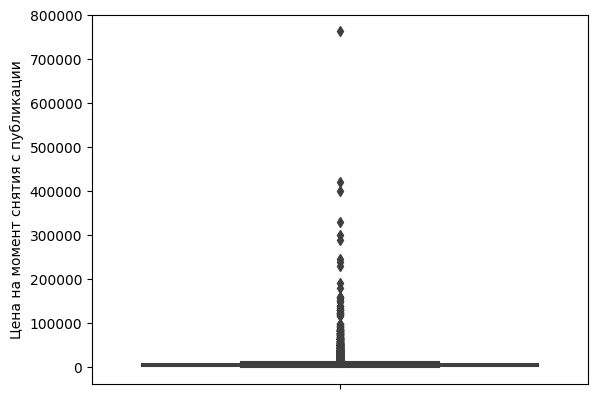

In [114]:
# отбросим данные с аномально низкой и высокой ценой
sb.boxplot(df, y='Цена на момент снятия с публикации')

In [115]:
df1 = df[(df['Цена на момент снятия с публикации'] > 100) & (df['Цена на момент снятия с публикации'] < 20000)]

<Axes: ylabel='Density'>

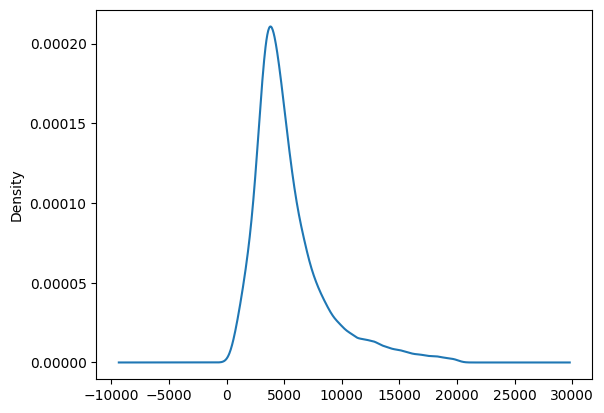

In [116]:
df1['Цена на момент снятия с публикации'].plot.density()
# распределение 'Цена на момент снятия с публикации' очень близко к нормальному

**2) 'Площадь квартиры в квадратных метрах (м²)'**

<Axes: ylabel='Площадь квартиры (м²)'>

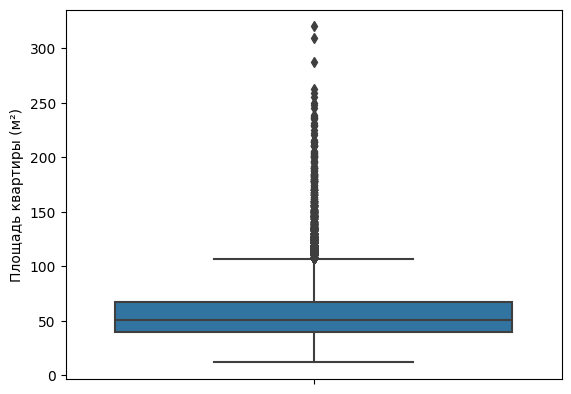

In [117]:
# отбросим данные с аномально маленькой и большой ценой Площадью квартиры
sb.boxplot(df1, y='Площадь квартиры (м²)')

In [118]:
df1['Площадь квартиры (м²)'].describe()
# по describe, наблюдаются квартиры с аномально маленькой и большой  Площадью квартиры

count    22974.000000
mean        56.446940
std         24.617323
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        320.000000
Name: Площадь квартиры (м²), dtype: float64

In [119]:
df1 = df1[(df1['Площадь квартиры (м²)'] > 15)&(df1['Площадь квартиры (м²)'] < 200)]

<Axes: ylabel='Density'>

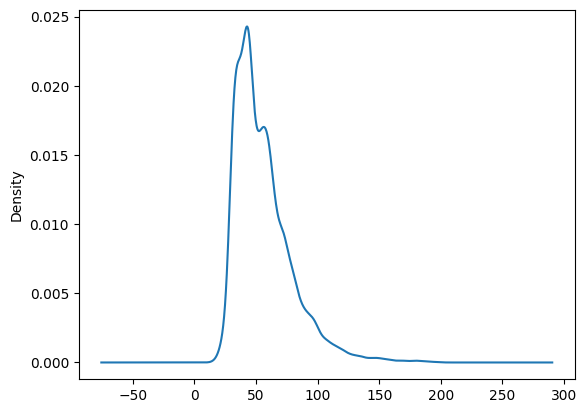

In [120]:
df1['Площадь квартиры (м²)'].plot.density()
# распределение 'Площади квартиры' очень близко к нормальному

**3) 'Число комнат'**

In [121]:
# отбросим данные с аномально , большим количеством комнат
df1["Число комнат"].value_counts()

1     8027
2     7862
3     5562
4      994
5      217
0      195
6       50
7       13
11       1
8        1
Name: Число комнат, dtype: int64

In [122]:
df1 = df1[(df1["Число комнат"] <= 6)]

<Axes: ylabel='Density'>

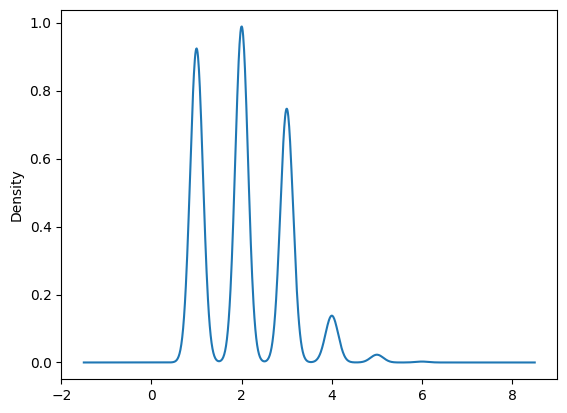

In [49]:
df1['Число комнат'].plot.density()
# на графике видно, явно выделяющиеся группы

**4) 'Высота потолков (м)'**

In [123]:
# отбросим данные с аномально высоким и низким потолком
df1['Высота потолков (м)'].describe()

count    13966.000000
mean         2.755125
std          1.279564
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: Высота потолков (м), dtype: float64

In [124]:
df1 = df1[(df1['Высота потолков (м)'] >= 2.4) & (df1['Высота потолков (м)'] <= 4)]

<Axes: ylabel='Density'>

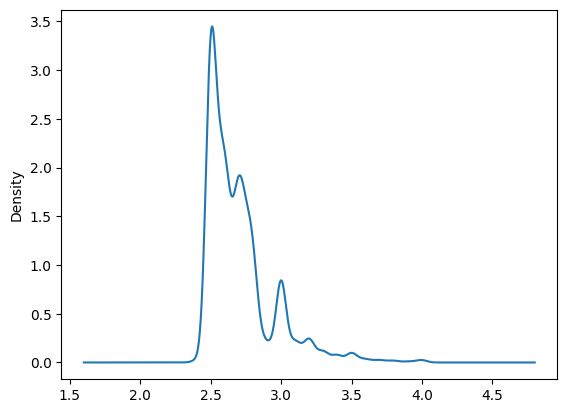

In [125]:
# распределение не выглядит нормальным
df1['Высота потолков (м)'].plot.density()

**5) 'Всего этажей в доме'**

<Axes: ylabel='Всего этажей в доме'>

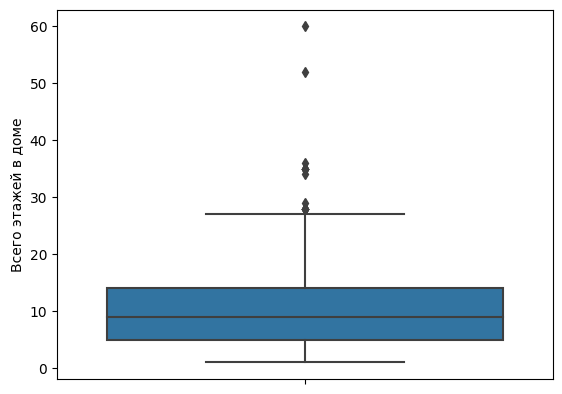

In [126]:
# отбросим данные с аномально большим и маленьким количеством этажей
sb.boxplot(df1, y='Всего этажей в доме')

In [127]:
df1['Всего этажей в доме'].describe()

count    13877.000000
mean        10.250991
std          6.223594
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: Всего этажей в доме, dtype: float64

In [128]:
df1=df1[(df1['Всего этажей в доме'] <= 50)]

<Axes: ylabel='Density'>

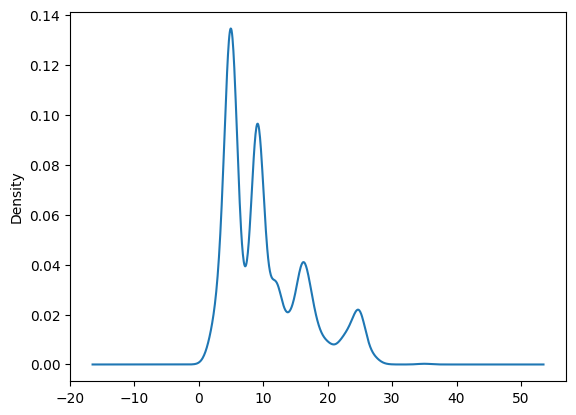

In [129]:
df1['Всего этажей в доме'].plot.density()
#  на графике явно выделяются 5 групп

**6) Жилая площадь в квадратных метрах(м²)**

<Axes: ylabel='Жилая площадь в квадратных метрах(м²)'>

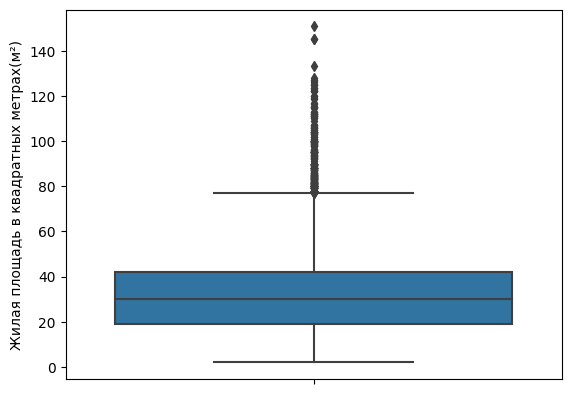

In [130]:
sb.boxplot(df1, y='Жилая площадь в квадратных метрах(м²)')
# отбросим данные с аномально большой и маленькой Жилой площадью

In [131]:
df1=df1[(df1['Жилая площадь в квадратных метрах(м²)'] <= 130)]

<Axes: ylabel='Density'>

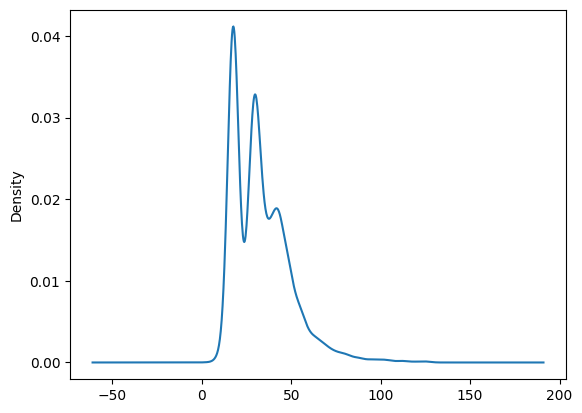

In [132]:
df1['Жилая площадь в квадратных метрах(м²)'].plot.density()
# на графике не наблюдается нормального распределения

**7) Этаж**

In [133]:
df1['Этаж'].describe()
# отбросим данные с аномально высоким этажом

count    13145.000000
mean         5.632864
std          4.614772
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: Этаж, dtype: float64

In [134]:
df1=df1[(df1['Этаж'] <= 25)]

<Axes: ylabel='Density'>

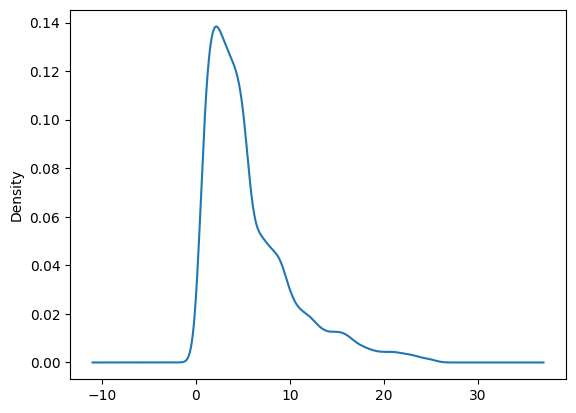

In [135]:
df1['Этаж'].plot.density()
# распределение на графике близко к нормальному

**8) 'Апартаменты (булев тип)'**

In [136]:
df1['Апартаменты (булев тип)'].value_counts()

False    1675
True       31
Name: Апартаменты (булев тип), dtype: int64

**9) 'Квартира-студия (булев тип)'**

In [137]:
df1['Квартира-студия (булев тип)'].value_counts()

0    13058
1       73
Name: Квартира-студия (булев тип), dtype: int64

**10) 'Свободная планировка (булев тип)'**

In [138]:
df1['Свободная планировка (булев тип)'].value_counts()

0    13119
1       12
Name: Свободная планировка (булев тип), dtype: int64

**11) Площадь кухни в квадратных метрах (м²)**

In [139]:
df1['Площадь кухни в квадратных метрах (м²)'].describe()

count    12779.000000
mean        10.015151
std          4.765943
min          1.300000
25%          7.000000
50%          9.000000
75%         11.400000
max         64.000000
Name: Площадь кухни в квадратных метрах (м²), dtype: float64

<Axes: ylabel='Площадь кухни в квадратных метрах (м²)'>

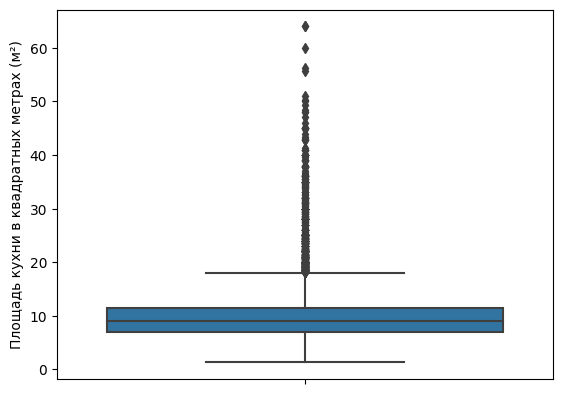

In [140]:
sb.boxplot(df1, y='Площадь кухни в квадратных метрах (м²)')
# отбросим данные с аномально большой 'Площадью кухни

In [141]:
df1 = df1[df1['Площадь кухни в квадратных метрах (м²)'] <= 55]

<Axes: ylabel='Density'>

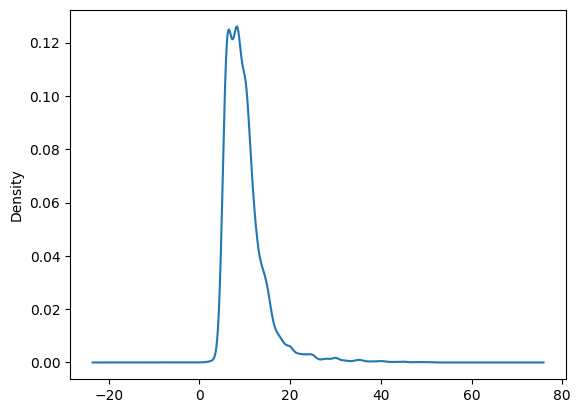

In [142]:
df1['Площадь кухни в квадратных метрах (м²)'].plot.density()
# распределение на графике не выглядит нормальным

**12) Число балконов**

In [146]:
df1['Число балконов'].value_counts()

1.0    2621
2.0    2297
0.0    1288
5.0     195
4.0     118
3.0      64
Name: Число балконов, dtype: int64

<Axes: xlabel='Число балконов', ylabel='count'>

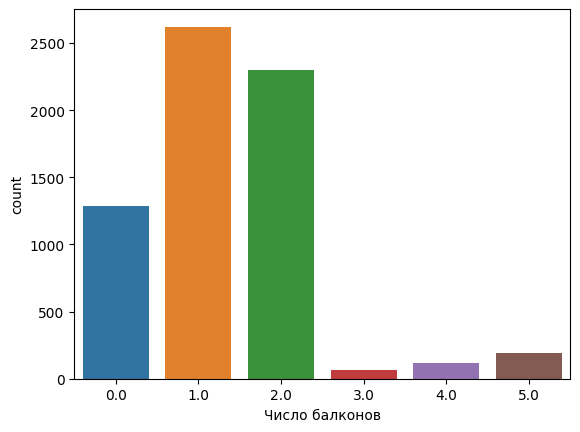

In [147]:
sb.countplot(df1, x='Число балконов')
# наибольшее количество квартир с 1 балконом

**13) 'Расстояние до ближайшего аэропорта в метрах (м)'**

<Axes: ylabel='Density'>

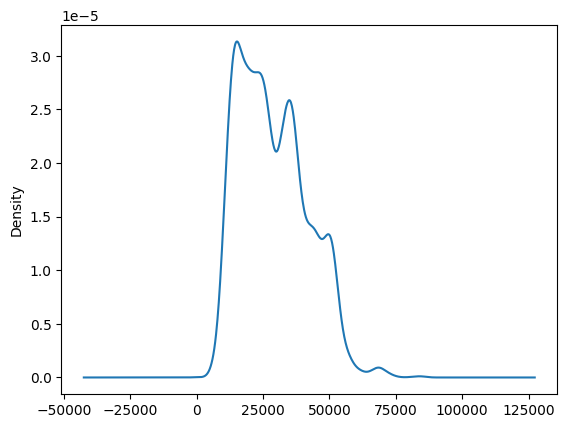

In [158]:
df1['Расстояние до ближайшего аэропорта(м)'].plot.density()
# распределение на графике не выглядит нормальным
# на графике можно выделить 5 групп

**14) Расстояние до центра города (м)**

<Axes: ylabel='Density'>

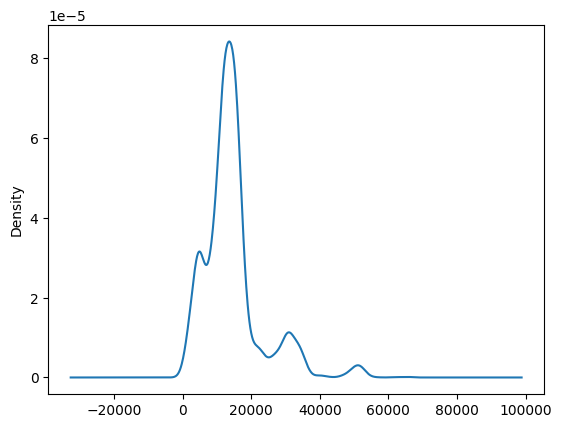

In [159]:
df1['Расстояние до центра города (м)'].plot.density()
# на графике можно выделить 5 групп

**15) Число парков в радиусе 3 км**

<Axes: xlabel='Число парков в радиусе 3 км', ylabel='count'>

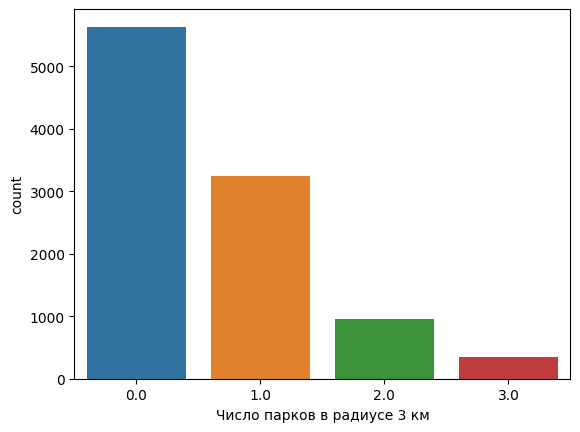

In [160]:
sb.countplot(df1, x='Число парков в радиусе 3 км' )
# большое количество квартир без парков в радиусе 3 км

In [161]:
df1['Число парков в радиусе 3 км'].value_counts()

0.0    5633
1.0    3239
2.0     952
3.0     353
Name: Число парков в радиусе 3 км, dtype: int64

**16) Расстояние до ближайшего парка (м)**

<Axes: ylabel='Density'>

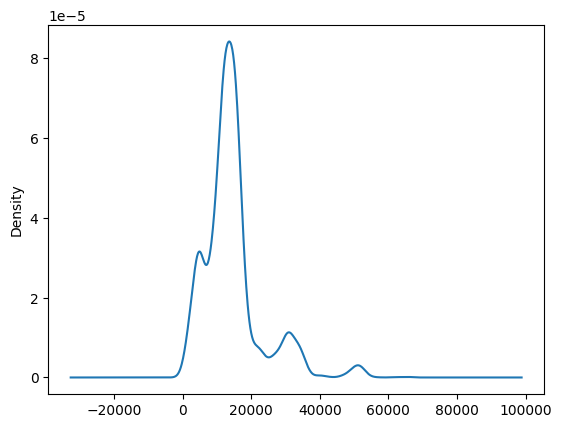

In [162]:
df1['Расстояние до центра города (м)'].plot.density()
# на графике можно выделить 5 групп

**17) Число водоёмов в радиусе 3 км**

In [163]:
df1['Число водоёмов в радиусе 3 км'].value_counts()

0.0    5262
1.0    3078
2.0    1070
3.0     767
Name: Число водоёмов в радиусе 3 км, dtype: int64

<Axes: xlabel='Число водоёмов в радиусе 3 км', ylabel='count'>

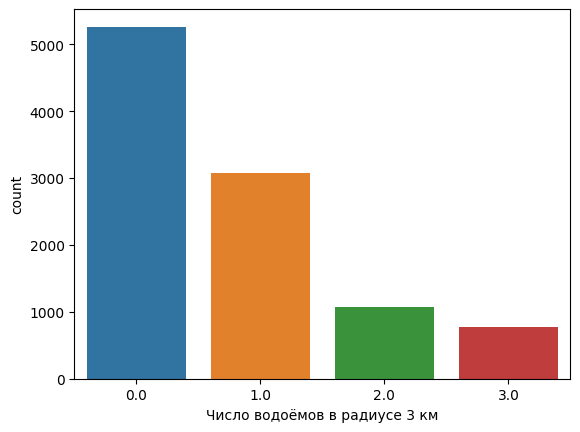

In [164]:
sb.countplot(df1, x='Число водоёмов в радиусе 3 км' )
# большое количество квартир без  водоёмов в радиусе 3 км

**18) 'Расстояние до ближайшего водоёма (м)'**

<Axes: ylabel='Density'>

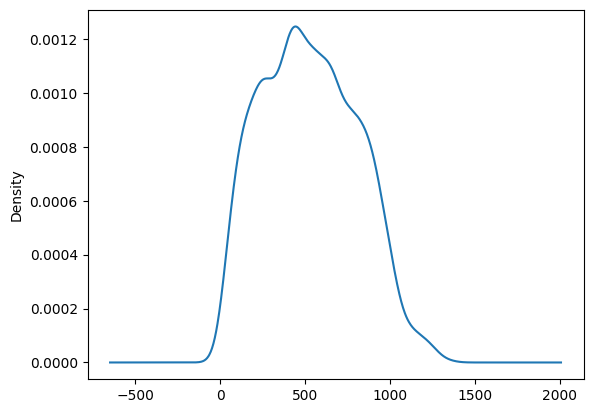

In [165]:
df1['Расстояние до ближайшего водоёма (м)'].plot.density()

**Вывод по одномерному анализу:**

1) при однамерном анализе выявили статистические выбросы, которые мешают при расчетах

2) выявили столбцы которые необходимо разделить на группы

**Задачи:**

1) необходимо выявить корреляции от которых зависит цена квартиры

2) выдвигаю гиппотезу, о том, что все столбцы коррелируют с таргетным столбцом, в большей или меньшей степени

# **2. Двумерный анализ**

In [294]:
# создадим новый df с данными без статистических выбросов
df1 = df[(df['Цена на момент снятия с публикации'] > 100) & (df['Цена на момент снятия с публикации'] < 20000) &
         (df['Площадь квартиры (м²)'] > 15)&(df['Площадь квартиры (м²)'] < 175) &
         (df["Число комнат"] <= 6) &
         (df['Высота потолков (м)'] >= 2.4) & (df['Высота потолков (м)'] <= 4)&
         (df['Всего этажей в доме'] <= 25) &
         (df['Жилая площадь в квадратных метрах(м²)'] <= 100) &
         (df['Площадь кухни в квадратных метрах (м²)'] <= 55)]

In [167]:
# выведем все средние значения по df
df1.mean()

Цена на момент снятия с публикации         5568.421158
Площадь квартиры (м²)                        56.856961
Число комнат                                  2.062937
Высота потолков (м)                           2.702046
Всего этажей в доме                          10.038541
Жилая площадь в квадратных метрах(м²)        32.995331
Этаж                                          5.517721
Апартаменты (булев тип)                       0.013224
Квартира-студия (булев тип)                   0.000000
Свободная планировка (булев тип)              0.000000
Площадь кухни в квадратных метрах (м²)        9.928133
Число балконов                                1.343012
Расстояние до ближайшего аэропорта(м)     28818.629826
Расстояние до центра города (м)           14495.704555
Число парков в радиусе 3 км                   0.611305
Расстояние до ближайшего парка (м)          476.998887
Число водоёмов в радиусе 3 км                 0.737441
Расстояние до ближайшего водоёма (м)        528.237130
dtype: flo

**1) 'Цена на момент снятия с публикации'**

In [168]:
# Расмотрим зависимость Цены от всех параметров

# для расчетов необходимо расчитать среднюю цену квартир
Average_price= df1['Цена на момент снятия с публикации'].mean()
Average_price

5568.421158137317

**2) 'Площадь квартиры (м²)'**

Рассмотрим возможные корреляции площади квартиры с ценой, и другими параметрами

<Axes: xlabel='Площадь квартиры (м²)', ylabel='Цена на момент снятия с публикации'>

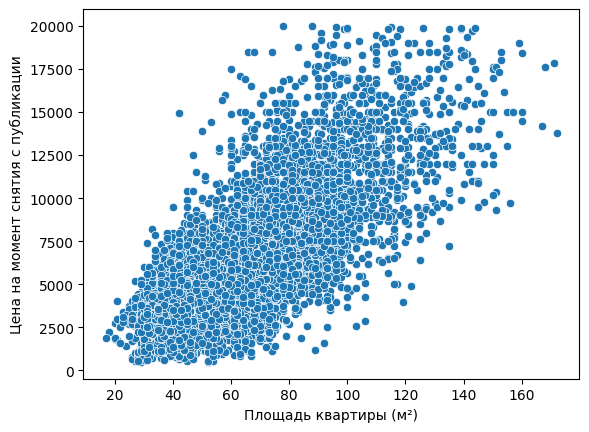

In [295]:
sb.scatterplot(df1, x='Площадь квартиры (м²)',  y='Цена на момент снятия с публикации')
# на графике наблюдается четкая положительная линейная зависимость Цены от Площади квартиры

In [188]:
df1['Площадь квартиры_кат'] = Series()
df1.loc[df1['Площадь квартиры (м²)'] <= 30, 'Площадь квартиры_кат'] = 1
df1.loc[(df1['Площадь квартиры (м²)'] > 30) & (df1['Площадь квартиры (м²)'] <= 80), 'Площадь квартиры_кат'] = 2
df1.loc[(df1['Площадь квартиры (м²)'] > 80) & (df1['Площадь квартиры (м²)'] <= 120), 'Площадь квартиры_кат'] = 3
df1.loc[(df1['Площадь квартиры (м²)'] > 160), 'Площадь квартиры_кат'] = 4
df['Площадь квартиры (м²)']= df['Площадь квартиры (м²)'].astype("int")

<ipython-input-188-b36c27fe5ba3>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1['Площадь квартиры_кат'] = Series()
<ipython-input-188-b36c27fe5ba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Площадь квартиры_кат'] = Series()


<Axes: xlabel='Площадь квартиры_кат', ylabel='Цена на момент снятия с публикации'>

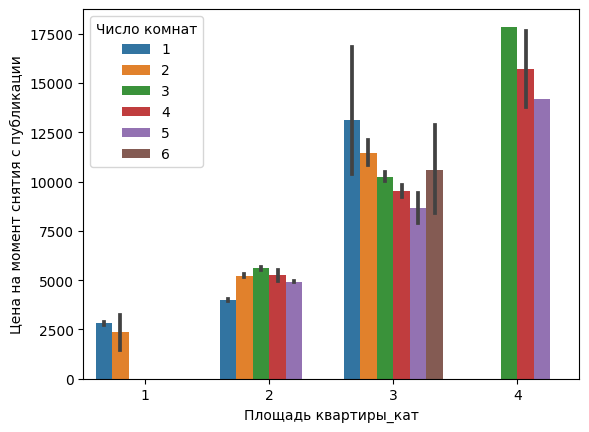

In [189]:
sb.barplot(df1, x='Площадь квартиры_кат',  y='Цена на момент снятия с публикации', hue="Число комнат", order=[1,2,3,4])
#  на графике видно, что площадь квартиры сильно растет от числа комнат

<Axes: xlabel='Площадь квартиры_кат', ylabel='Площадь кухни в квадратных метрах (м²)'>

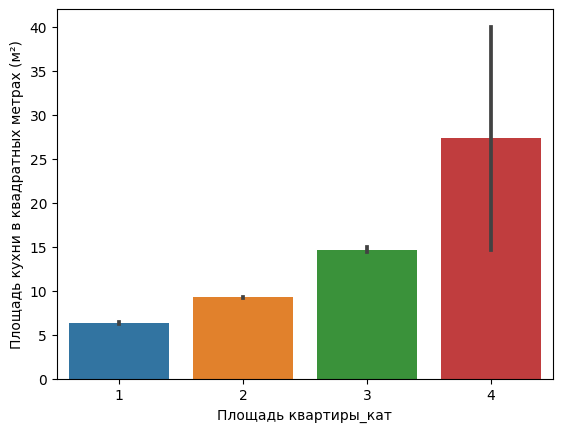

In [190]:
sb.barplot(df1, x='Площадь квартиры_кат',  y='Площадь кухни в квадратных метрах (м²)', order=[1,2,3,4])
#  на графике видно, что площадь квартиры сильно растет от Площади кухни

<Axes: xlabel='Площадь квартиры (м²)', ylabel='Жилая площадь в квадратных метрах(м²)'>

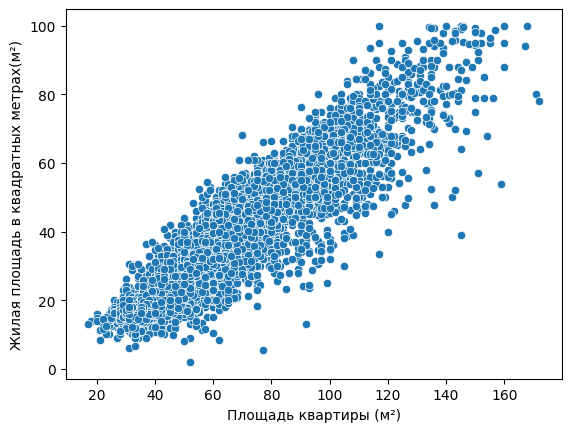

In [191]:
sb.scatterplot(df1, x='Площадь квартиры (м²)',  y='Жилая площадь в квадратных метрах(м²)')
#  на графике видно, что площадь квартиры сильно растет от Жилая площадь

**3) 'Число комнат'**

<Axes: xlabel='Число комнат', ylabel='Цена на момент снятия с публикации'>

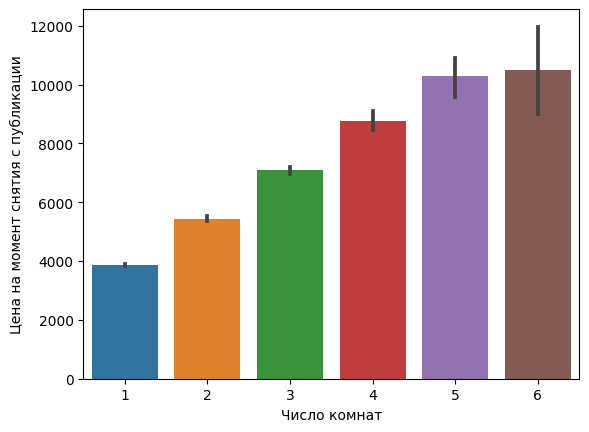

In [192]:
sb.barplot(df1, x='Число комнат',  y='Цена на момент снятия с публикации')
# на графике наблюдается положительная зависимость Цены от Числа комнат

In [193]:
# для построения модели расчета Стоимости квартиры, необходимо найти
# коэффициент увеличения средней стоимости квартиры, в зависимости от числа комнат
# от средней цены по всему df
def Number_Rooms(df):
  NR_1 = df[df['Число комнат']== 1]['Цена на момент снятия с публикации'].mean()
  NR_2 = df[df['Число комнат']== 2]['Цена на момент снятия с публикации'].mean()
  NR_3 = df[df['Число комнат']== 3]['Цена на момент снятия с публикации'].mean()
  NR_4 = df[df['Число комнат']== 4]['Цена на момент снятия с публикации'].mean()
  NR_5 = df[df['Число комнат']== 5]['Цена на момент снятия с публикации'].mean()
  NR_6 = df[df['Число комнат']== 6]['Цена на момент снятия с публикации'].mean()
  NR_1_coeffic = (NR_1/Average_price)
  NR_2_coeffic = (NR_2/Average_price)
  NR_3_coeffic = (NR_3/Average_price)
  NR_4_coeffic = (NR_4/Average_price)
  NR_5_coeffic = (NR_5/Average_price)
  NR_6_coeffic = (NR_6/Average_price)
  print("NR_1_coeffic =", NR_1_coeffic, "NR_2_coeffic =", NR_2_coeffic, "NR_3_coeffic =", NR_3_coeffic, "NR_4_coeffic =", NR_4_coeffic, "NR_5_coeffic =", NR_5_coeffic,  "NR_6_coeffic =", NR_6_coeffic)

In [194]:
Number_Rooms(df1)

NR_1_coeffic = 0.6948262101186091 NR_2_coeffic = 0.9775270660070309 NR_3_coeffic = 1.2724089909825431 NR_4_coeffic = 1.5738971154443004 NR_5_coeffic = 1.8453817434555182 NR_6_coeffic = 1.8850196555255758


<Axes: xlabel='Число комнат', ylabel='Жилая площадь в квадратных метрах(м²)'>

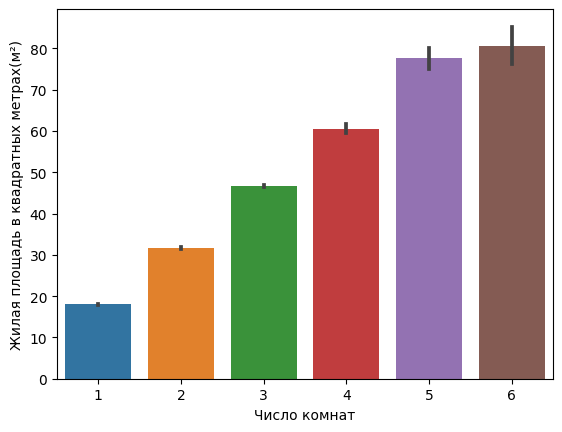

In [195]:
sb.barplot(df1, x='Число комнат',  y='Жилая площадь в квадратных метрах(м²)')
# на графике наблюдается положительная зависимость  Числа комнат от Жилая площадь

**4) 'Высота потолков (м)'**

<Axes: xlabel='Высота потолков (м)', ylabel='Цена на момент снятия с публикации'>

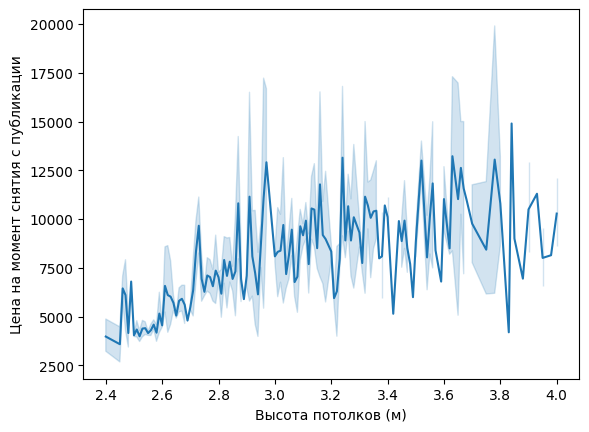

In [196]:
sb.lineplot(df1, x='Высота потолков (м)',  y='Цена на момент снятия с публикации')
# на графике наблюдается четкая положительная линейная зависимость Цены от Высоты потолков

<Axes: xlabel='Высота потолков (м)', ylabel='Площадь квартиры (м²)'>

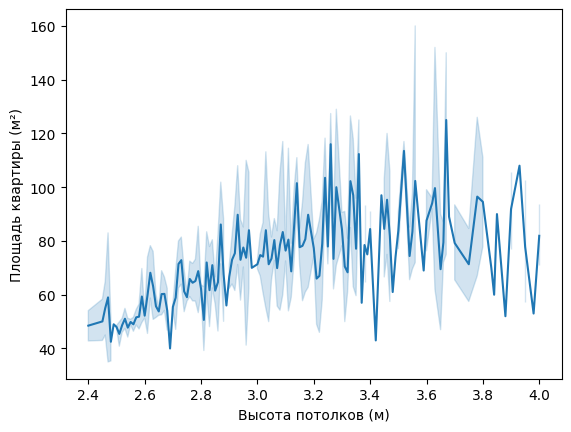

In [197]:
sb.lineplot(df1, x='Высота потолков (м)',  y='Площадь квартиры (м²)')
# на графике наблюдается четкая положительная линейная зависимость Высота потолков от Площадь квартиры

<Axes: xlabel='Высота потолков (м)', ylabel='Цена на момент снятия с публикации'>

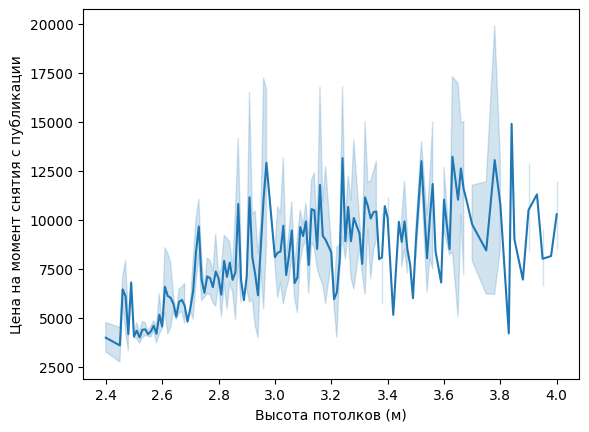

In [198]:
sb.lineplot(df1, x='Высота потолков (м)',  y='Цена на момент снятия с публикации')

**5) 'Всего этажей в доме'**

<Axes: xlabel='Всего этажей в доме', ylabel='Цена на момент снятия с публикации'>

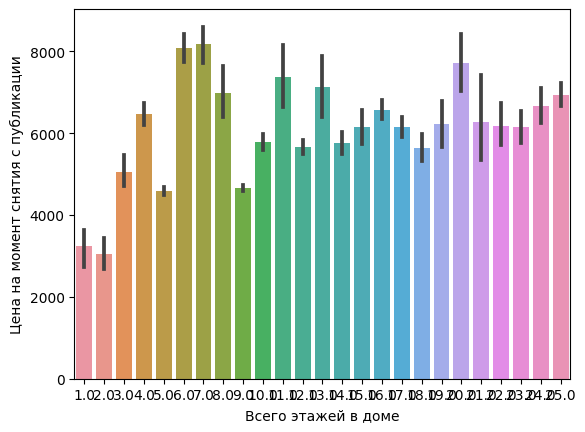

In [199]:
sb.barplot(df1, x='Всего этажей в доме',  y='Цена на момент снятия с публикации')
# на графике не видно корреляций, поэтому столбец необходимо разбить на группы

In [200]:
df1['Этажей в доме_кат'] = Series()
df1.loc[df1['Всего этажей в доме'] <= 2, 'Этажей в доме_кат'] = '1'
df1.loc[(df1['Всего этажей в доме'] > 2) & (df1['Всего этажей в доме'] <= 6), 'Этажей в доме_кат'] = "2"
df1.loc[(df1['Всего этажей в доме'] > 6) & (df1['Всего этажей в доме'] <= 12), 'Этажей в доме_кат'] = "3"
df1.loc[(df1['Всего этажей в доме'] > 12) & (df1['Всего этажей в доме'] <= 15), 'Этажей в доме_кат'] = "4"
df1.loc[(df1['Всего этажей в доме'] > 15), 'Этажей в доме_кат'] = "5"

<ipython-input-200-810a47ad6335>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1['Этажей в доме_кат'] = Series()
<ipython-input-200-810a47ad6335>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Этажей в доме_кат'] = Series()


<Axes: xlabel='Этажей в доме_кат', ylabel='Цена на момент снятия с публикации'>

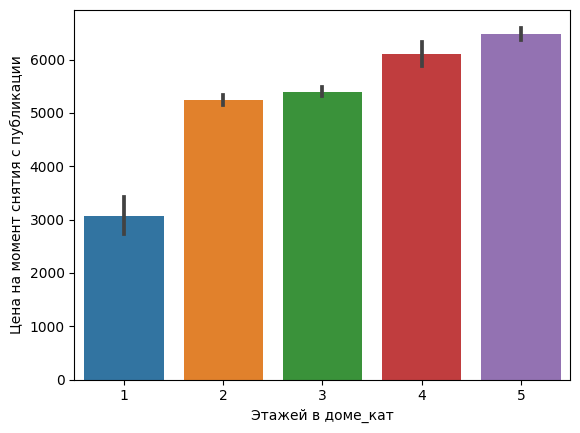

In [201]:
sb.barplot(df1, x='Этажей в доме_кат',  y='Цена на момент снятия с публикации', order=["1", "2", "3", "4", "5"])
# при разделении на группы, корреляция стала видна

In [202]:
# для построения модели прогнозирования Стоимости квартиры, необходимо найти
# коэффициент увеличения средней стоимости квартиры (разделенных по этажам) от средней цены по всему df
def Floors_house(df):
  F_1 = df[df['Этажей в доме_кат']== "1"]['Цена на момент снятия с публикации'].mean()
  F_2 = df[df['Этажей в доме_кат']== "2"]['Цена на момент снятия с публикации'].mean()
  F_3 = df[df['Этажей в доме_кат']== "3"]['Цена на момент снятия с публикации'].mean()
  F_4 = df[df['Этажей в доме_кат']== "4"]['Цена на момент снятия с публикации'].mean()
  F_5 = df[df['Этажей в доме_кат']== "5"]['Цена на момент снятия с публикации'].mean()
  F_1_coeffic = (F_1/Average_price)
  F_2_coeffic = (F_2/Average_price)
  F_3_coeffic = (F_3/Average_price)
  F_4_coeffic = (F_4/Average_price)
  F_5_coeffic = (F_5/Average_price)
  print("F_1_coeffic =", F_1_coeffic, "F_2_coeffic =", F_2_coeffic, "F_3_coeffic =", F_3_coeffic, "F_4_coeffic =", F_4_coeffic, "F_5_coeffic =", F_5_coeffic)

In [203]:
Floors_house(df1)

F_1_coeffic = 0.5507058048561637 F_2_coeffic = 0.9404838137809446 F_3_coeffic = 0.969650012333816 F_4_coeffic = 1.095926294760641 F_5_coeffic = 1.1642062865602403


**6) 'Жилая площадь в квадратных метрах(м²)'**

<Axes: xlabel='Жилая площадь в квадратных метрах(м²)', ylabel='Цена на момент снятия с публикации'>

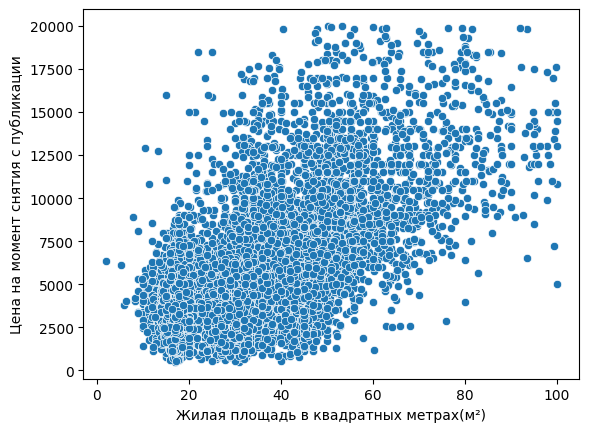

In [204]:
sb.scatterplot(df1, x='Жилая площадь в квадратных метрах(м²)',  y='Цена на момент снятия с публикации')
# на графике наблюдается четкая положительная линейная зависимость Цены от Жилой площади

**7) 'Этаж'**

<Axes: xlabel='Этаж', ylabel='Цена на момент снятия с публикации'>

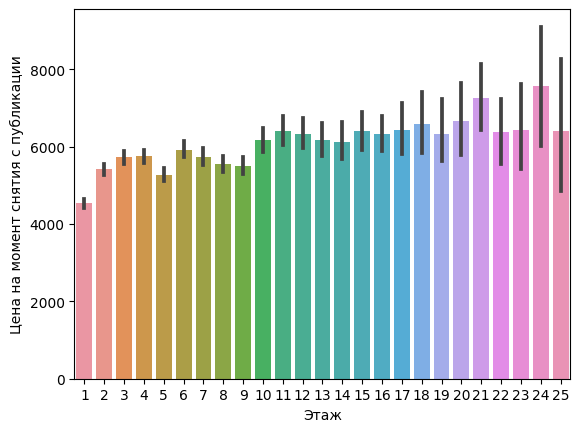

In [205]:
sb.barplot(df1, x='Этаж',  y='Цена на момент снятия с публикации')
# на графике не видно корреляций, поэтому столбец необходимо разбить на группы

In [206]:
df1['Этаж_кат'] = Series()
df1.loc[df1['Этаж'] <= 5, 'Этаж_кат'] = '1'
df1.loc[(df1['Этаж'] > 5) & (df1['Этаж'] <= 10), 'Этаж_кат'] = "2"
df1.loc[(df1['Этаж'] > 10) & (df1['Этаж'] <= 15), 'Этаж_кат'] = "3"
df1.loc[(df1['Этаж'] > 15) & (df1['Этаж'] <= 20), 'Этаж_кат'] = "4"
df1.loc[(df1['Этаж'] > 20), 'Этаж_кат'] = "5"

<ipython-input-206-b51c931827f9>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1['Этаж_кат'] = Series()
<ipython-input-206-b51c931827f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Этаж_кат'] = Series()


<Axes: xlabel='Этаж_кат', ylabel='Цена на момент снятия с публикации'>

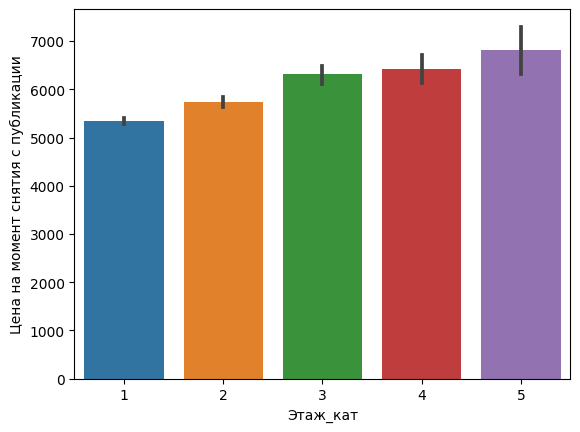

In [207]:
sb.barplot(df1, x='Этаж_кат',  y='Цена на момент снятия с публикации', order=["1", "2", "3", "4", "5"])
# при разделении на группы, корреляция стала видна

In [208]:
# для построения модели прогнозирования Стоимости квартиры, необходимо найти
# коэффициент увеличения средней стоимости квартиры (разделенных по группам этажей) от средней цены по всему df
def Floors(df):
  Flo_1 = df[df['Этаж_кат']== "1"]['Цена на момент снятия с публикации'].mean()
  Flo_2 = df[df['Этаж_кат']== "2"]['Цена на момент снятия с публикации'].mean()
  Flo_3 = df[df['Этаж_кат']== "3"]['Цена на момент снятия с публикации'].mean()
  Flo_4 = df[df['Этаж_кат']== "4"]['Цена на момент снятия с публикации'].mean()
  Flo_5 = df[df['Этаж_кат']== "5"]['Цена на момент снятия с публикации'].mean()
  Flo_1_coeffic = (Flo_1/Average_price)
  Flo_2_coeffic = (Flo_2/Average_price)
  Flo_3_coeffic = (Flo_3/Average_price)
  Flo_4_coeffic = (Flo_4/Average_price)
  Flo_5_coeffic = (Flo_5/Average_price)
  print("Flo_1_coeffic =", Flo_1_coeffic, "Flo_2_coeffic =", Flo_2_coeffic, "Flo_3_coeffic =", Flo_3_coeffic, "Flo_4_coeffic =", Flo_4_coeffic, "Flo_5_coeffic =", Flo_5_coeffic)

In [209]:
Floors(df1)

Flo_1_coeffic = 0.96032146038138 Flo_2_coeffic = 1.032012167857653 Flo_3_coeffic = 1.1327963380184507 Flo_4_coeffic = 1.1548066065853582 Flo_5_coeffic = 1.2247214720577264


**8) 'Апартаменты (булев тип)'**

<Axes: xlabel='Апартаменты (булев тип)', ylabel='Цена на момент снятия с публикации'>

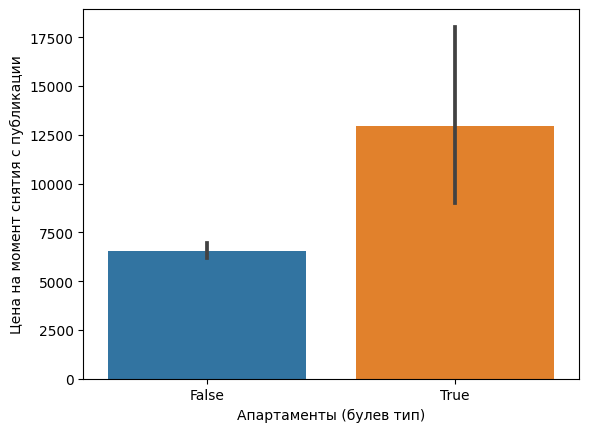

In [210]:
sb.barplot(df, x='Апартаменты (булев тип)',  y='Цена на момент снятия с публикации')
# на графике видно как цена увеличивается в 2 раза если квартира является Апартаментами

**9) 'Квартира-студия (булев тип)'**

<Axes: xlabel='Квартира-студия (булев тип)', ylabel='Цена на момент снятия с публикации'>

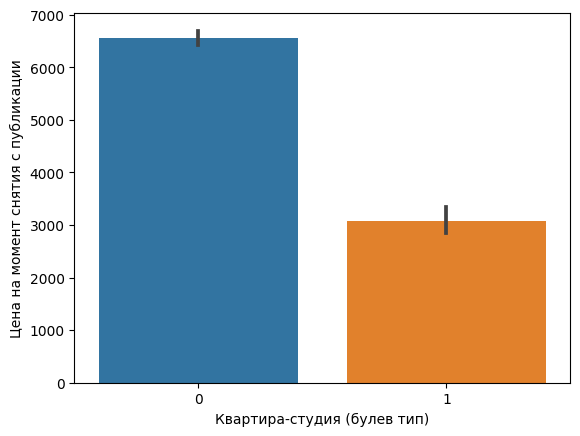

In [211]:
sb.barplot(df, x='Квартира-студия (булев тип)',  y='Цена на момент снятия с публикации')
# на графике видно как цена уменьшается в 2 раза если квартира является Квартирой-студией

**10) 'Свободная планировка (булев тип)'**

<Axes: xlabel='Свободная планировка (булев тип)', ylabel='Цена на момент снятия с публикации'>

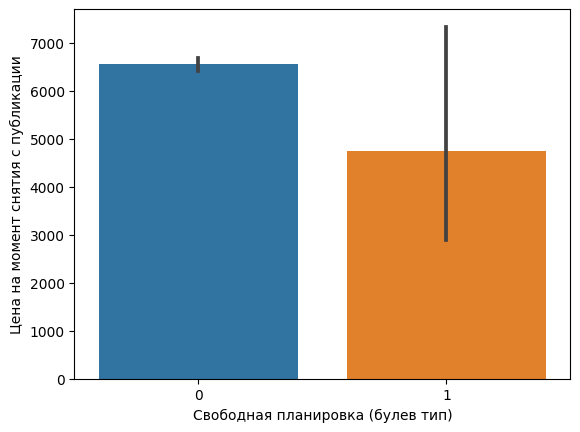

In [212]:
sb.barplot(df, x='Свободная планировка (булев тип)',  y='Цена на момент снятия с публикации')
# на графике видно как цена уменьшается а если квартира является имеет Свободную планировку

**11) 'Площадь кухни в квадратных метрах (м²)'**

<Axes: xlabel='Площадь кухни в квадратных метрах (м²)', ylabel='Цена на момент снятия с публикации'>

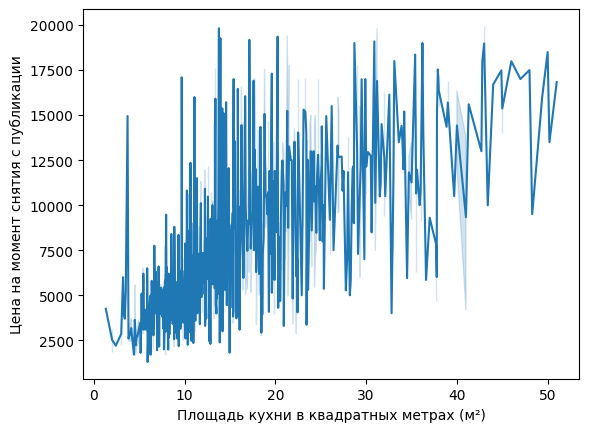

In [213]:
sb.lineplot(df1, x='Площадь кухни в квадратных метрах (м²)',  y='Цена на момент снятия с публикации')
# на графике наблюдается явная положительная линейная корреляция

**12) 'Число балконов'**

<Axes: xlabel='Число балконов', ylabel='Цена на момент снятия с публикации'>

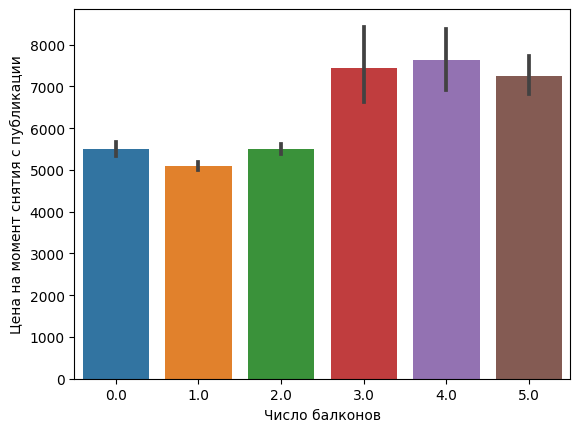

In [214]:
sb.barplot(df1, x='Число балконов',  y='Цена на момент снятия с публикации')
# на графике видно что количество балконов влияет на цену

In [215]:
# для построения модели прогнозирования Стоимости квартиры, для категориальных столбцов необходимо найти
# коэффициент увеличения средней стоимости квартиры (разделенных по группам этажей) от средней цены по всему df
def N_balconies(df):
  B_0 = df[df['Число балконов']== 0]['Цена на момент снятия с публикации'].mean()
  B_1 = df[df['Число балконов']== 1]['Цена на момент снятия с публикации'].mean()
  B_2 = df[df['Число балконов']== 2]['Цена на момент снятия с публикации'].mean()
  B_3 = df[df['Число балконов']== 3]['Цена на момент снятия с публикации'].mean()
  B_4 = df[df['Число балконов']== 4]['Цена на момент снятия с публикации'].mean()
  B_5 = df[df['Число балконов']== 5]['Цена на момент снятия с публикации'].mean()
  B_0_coeffic = (B_0/Average_price)
  B_1_coeffic = (B_1/Average_price)
  B_2_coeffic = (B_2/Average_price)
  B_3_coeffic = (B_3/Average_price)
  B_4_coeffic = (B_4/Average_price)
  B_5_coeffic = (B_5/Average_price)
  print("B_0_coeffic =", B_0_coeffic, "B_1_coeffic =", B_1_coeffic, "B_2_coeffic =", B_2_coeffic, "B_3_coeffic =", B_3_coeffic, "B_4_coeffic =", B_4_coeffic, "B_5_coeffic =", B_5_coeffic)

In [216]:
N_balconies(df1)

B_0_coeffic = 0.9878317831630485 B_1_coeffic = 0.9148241498556073 B_2_coeffic = 0.98903915728434 B_3_coeffic = 1.335122397963648 B_4_coeffic = 1.368843865942221 B_5_coeffic = 1.302015613720552


**13) Расстояние до ближайшего аэропорта(м)**

<Axes: xlabel='Расстояние до ближайшего аэропорта(м)', ylabel='Цена на момент снятия с публикации'>

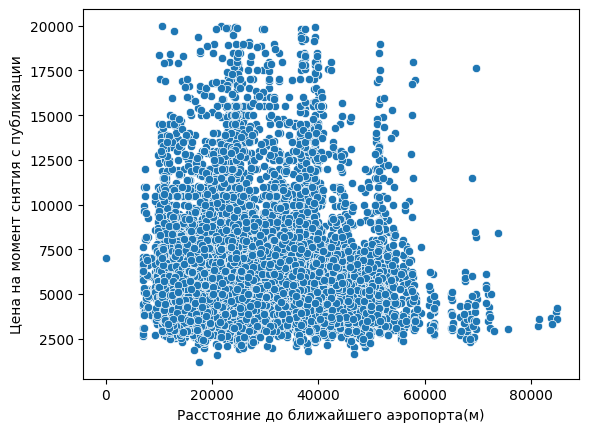

In [217]:
sb.scatterplot(df1, x='Расстояние до ближайшего аэропорта(м)',  y='Цена на момент снятия с публикации')
# на графике корреляции не наблюдается, поэтому разделим на столбец 'Расстояние до ближайшего аэропорта(м)' на группы по 2000 м

In [218]:
df1['Раст_до_аэроп_кат'] = Series()
df1.loc[df1['Расстояние до ближайшего аэропорта(м)'] < 10000, 'Раст_до_аэроп_кат'] = '1'
df1.loc[(df1['Расстояние до ближайшего аэропорта(м)'] >= 10000) & (df1['Расстояние до ближайшего аэропорта(м)'] <= 20000), 'Раст_до_аэроп_кат'] = "2"
df1.loc[(df1['Расстояние до ближайшего аэропорта(м)'] >= 20000) & (df1['Расстояние до ближайшего аэропорта(м)'] <= 30000), 'Раст_до_аэроп_кат'] = "3"
df1.loc[(df1['Расстояние до ближайшего аэропорта(м)'] >= 30000) & (df1['Расстояние до ближайшего аэропорта(м)'] <= 40000), 'Раст_до_аэроп_кат'] = "4"
df1.loc[(df1['Расстояние до ближайшего аэропорта(м)'] >= 40000) & (df1['Расстояние до ближайшего аэропорта(м)'] <= 50000), 'Раст_до_аэроп_кат'] = "5"
df1.loc[(df1['Расстояние до ближайшего аэропорта(м)'] >= 60000), 'Раст_до_аэроп_кат'] = "6"

<ipython-input-218-87d1e4d918fc>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1['Раст_до_аэроп_кат'] = Series()
<ipython-input-218-87d1e4d918fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Раст_до_аэроп_кат'] = Series()


<Axes: xlabel='Раст_до_аэроп_кат', ylabel='Цена на момент снятия с публикации'>

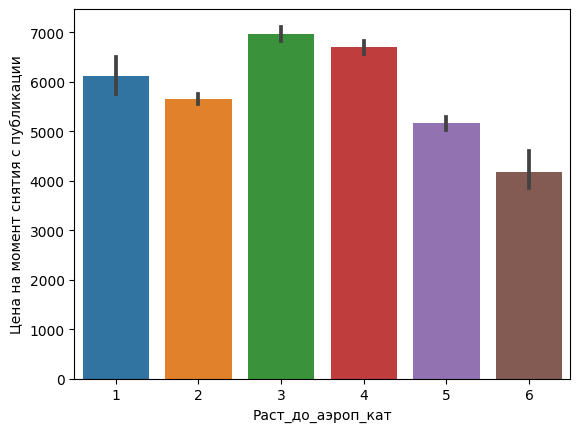

In [219]:
sb.barplot(df1, x='Раст_до_аэроп_кат',  y='Цена на момент снятия с публикации', order=["1", "2", "3", "4", "5", "6"])
# необходимо найти свой коэффициент для кадой отдельной группы

In [220]:
# для построения модели прогнозирования Стоимости квартиры, для категориальных столбцов необходимо найти
# коэффициент увеличения средней стоимости квартиры в каждой группе (по удаленности от аэропорта) от средней цены всего df
def r_airport1(df):
  A_1 = df[df['Раст_до_аэроп_кат']== '1']['Цена на момент снятия с публикации'].mean()
  A_2 = df[df['Раст_до_аэроп_кат']== '2']['Цена на момент снятия с публикации'].mean()
  A_3 = df[df['Раст_до_аэроп_кат']== '3']['Цена на момент снятия с публикации'].mean()
  A_4 = df[df['Раст_до_аэроп_кат']== '4']['Цена на момент снятия с публикации'].mean()
  A_5 = df[df['Раст_до_аэроп_кат']== '5']['Цена на момент снятия с публикации'].mean()
  A_6 = df[df['Раст_до_аэроп_кат']== '6']['Цена на момент снятия с публикации'].mean()
  A_1_coeffic = (A_1/Average_price)
  A_2_coeffic = (A_2/Average_price)
  A_3_coeffic = (A_3/Average_price)
  A_4_coeffic = (A_4/Average_price)
  A_5_coeffic = (A_5/Average_price)
  A_6_coeffic = (A_6/Average_price)
  print("A_1_coeffic =", A_1_coeffic, "A_2_coeffic =", A_2_coeffic, "A_3_coeffic =", A_3_coeffic, "A_4_coeffic =", A_4_coeffic, "A_5_coeffic =", A_5_coeffic, "A_6_coeffic =", A_6_coeffic)

In [221]:
r_airport1(df1)

A_1_coeffic = 1.0979686240698336 A_2_coeffic = 1.0152254633704805 A_3_coeffic = 1.2521338659169263 A_4_coeffic = 1.202542558522852 A_5_coeffic = 0.9266722307441139 A_6_coeffic = 0.7506929933746459


**14) 'Расстояние до центра города (м)**

<Axes: xlabel='Расстояние до центра города (м)', ylabel='Цена на момент снятия с публикации'>

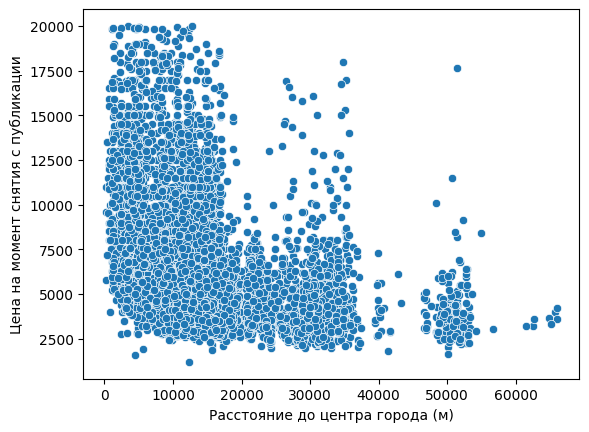

In [222]:
sb.scatterplot(df1, x='Расстояние до центра города (м)',  y='Цена на момент снятия с публикации')
# на графике четкой корреляции не наблюдается, поэтому разделим на столбец 'Расстояние до центра города (м)' на группы по 2000 м

In [223]:
df1['Раст_до_Цгорода_кат'] = Series()
df1.loc[df1['Расстояние до центра города (м)'] < 10000, 'Раст_до_Цгорода_кат'] = '1'
df1.loc[(df1['Расстояние до центра города (м)'] >= 10000) & (df1['Расстояние до центра города (м)'] <= 20000), 'Раст_до_Цгорода_кат'] = "2"
df1.loc[(df1['Расстояние до центра города (м)'] >= 20000) & (df1['Расстояние до центра города (м)'] <= 30000), 'Раст_до_Цгорода_кат'] = "3"
df1.loc[(df1['Расстояние до центра города (м)'] >= 30000) & (df1['Расстояние до центра города (м)'] <= 40000), 'Раст_до_Цгорода_кат'] = "4"
df1.loc[(df1['Расстояние до центра города (м)'] >= 40000) & (df1['Расстояние до центра города (м)'] <= 50000), 'Раст_до_Цгорода_кат'] = "5"
df1.loc[(df1['Расстояние до центра города (м)'] >= 60000), 'Раст_до_Цгорода_кат'] = "6"

<ipython-input-223-ac94b40acfc4>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1['Раст_до_Цгорода_кат'] = Series()
<ipython-input-223-ac94b40acfc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Раст_до_Цгорода_кат'] = Series()


<Axes: xlabel='Раст_до_Цгорода_кат', ylabel='Цена на момент снятия с публикации'>

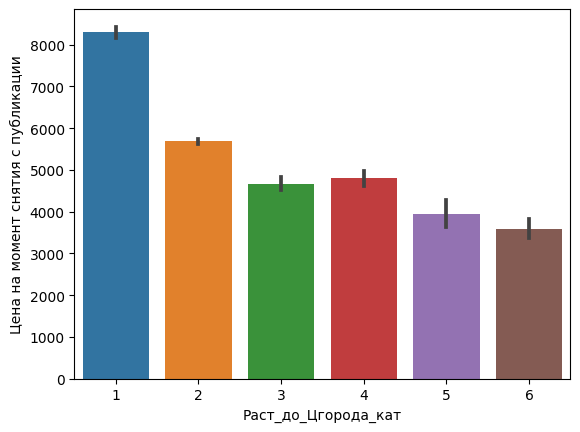

In [224]:
sb.barplot(df1, x='Раст_до_Цгорода_кат',  y='Цена на момент снятия с публикации', order=["1", "2", "3", "4", "5", "6"])
# на графике наблюдается следующая зависимость: квартиры с самой дорогой ценой в блиском расположении от центра

In [225]:
# найдем средний коэффициент, в который уменьшается цена квартиры при отдалении ее от центра
def r_zentr(df):
  R_1 = df[df['Раст_до_Цгорода_кат']== '1']['Цена на момент снятия с публикации'].mean()
  R_2 = df[df['Раст_до_Цгорода_кат']== '2']['Цена на момент снятия с публикации'].mean()
  R_3 = df[df['Раст_до_Цгорода_кат']== '3']['Цена на момент снятия с публикации'].mean()
  R_4 = df[df['Раст_до_Цгорода_кат']== '4']['Цена на момент снятия с публикации'].mean()
  R_5 = df[df['Раст_до_Цгорода_кат']== '5']['Цена на момент снятия с публикации'].mean()
  R_6 = df[df['Раст_до_Цгорода_кат']== '6']['Цена на момент снятия с публикации'].mean()
  R_1_coeffic = (R_1/Average_price)
  R_2_coeffic = (R_2/Average_price)
  R_3_coeffic = (R_3/Average_price)
  R_4_coeffic = (R_4/Average_price)
  R_5_coeffic = (R_5/Average_price)
  R_6_coeffic = (R_6/Average_price)
  print("R_1_coeffic =", R_1_coeffic, "R_2_coeffic =", R_2_coeffic,"R_3_coeffic =", R_3_coeffic, "R_4_coeffic =", R_4_coeffic,"R_5_coeffic =", R_5_coeffic, "R_6_coeffic =", R_6_coeffic)

In [226]:
r_zentr(df1)

R_1_coeffic = 1.4897933614933074 R_2_coeffic = 1.021068384611602 R_3_coeffic = 0.8384182111524973 R_4_coeffic = 0.8618830916292699 R_5_coeffic = 0.7077554899743995 R_6_coeffic = 0.6453804225544856


**15) 'Число парков в радиусе 3 км'**

<Axes: xlabel='Число парков в радиусе 3 км', ylabel='Цена на момент снятия с публикации'>

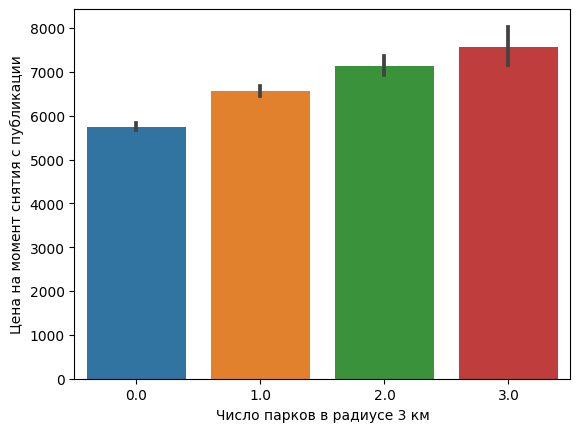

In [227]:
sb.barplot(df1, x='Число парков в радиусе 3 км',  y='Цена на момент снятия с публикации')
# на графике видна небольшая положительная корреляция при росте числа парков растет цена

In [228]:
# найдем средний коэффициент, в который увеличивается цена квартиры при разных количествах парков
def c_park(df):
  P_0 = df[df['Число парков в радиусе 3 км']== 1]['Цена на момент снятия с публикации'].mean()
#  return P_0
  P_1 = df[df['Число парков в радиусе 3 км']== 2]['Цена на момент снятия с публикации'].mean()
  P_2 = df[df['Число парков в радиусе 3 км']== 3]['Цена на момент снятия с публикации'].mean()
  P_3 = df[df['Число парков в радиусе 3 км']== 4]['Цена на момент снятия с публикации'].mean()
  P_0_coeffic = (P_0/Average_price)
  P_1_coeffic = (P_1/Average_price)
  P_2_coeffic = (P_2/Average_price)
  P_3_coeffic = (P_3/Average_price)
  print("P_0_coeffic =", P_0_coeffic, "P_1_coeffic =", P_1_coeffic,"P_2_coeffic =", P_2_coeffic, "P_3_coeffic =", P_3_coeffic)

In [229]:
c_park(df1)

P_0_coeffic = 1.1774655352902998 P_1_coeffic = 1.281644059113037 P_2_coeffic = 1.3587449802454485 P_3_coeffic = nan


**16) 'Расстояние до ближайшего парка (м)**

<Axes: xlabel='Расстояние до ближайшего парка (м)', ylabel='Цена на момент снятия с публикации'>

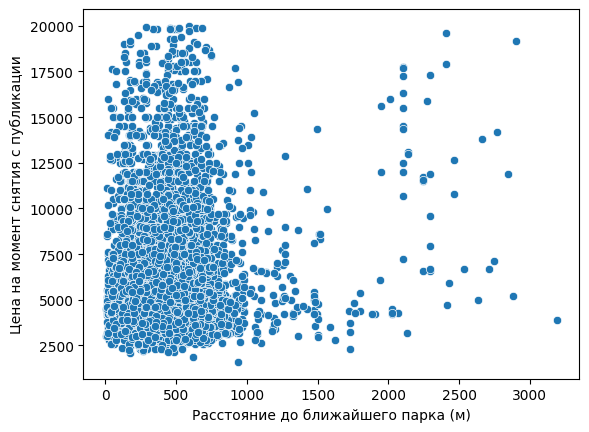

In [230]:
sb.scatterplot(df1, x='Расстояние до ближайшего парка (м)',  y='Цена на момент снятия с публикации')
# на графике четкой корреляции не наблюдается, поэтому разделим на столбец 'Расстояние до ближайшего парка (м)' на группы по 200 м

In [231]:
df1['Раст_до_парка'] = Series()
df1.loc[df1['Расстояние до ближайшего парка (м)'] < 200, 'Раст_до_парка'] = '1'
df1.loc[(df1['Расстояние до ближайшего парка (м)'] >= 200) & (df1['Расстояние до ближайшего парка (м)'] <= 400), 'Раст_до_парка'] = "2"
df1.loc[(df1['Расстояние до ближайшего парка (м)'] >= 400) & (df1['Расстояние до ближайшего парка (м)'] <= 600), 'Раст_до_парка'] = "3"
df1.loc[(df1['Расстояние до ближайшего парка (м)'] >= 600) & (df1['Расстояние до ближайшего парка (м)'] <= 800), 'Раст_до_парка'] = "4"
df1.loc[(df1['Расстояние до ближайшего парка (м)'] >= 1000) & (df1['Расстояние до ближайшего парка (м)'] <= 1200), 'Раст_до_парка'] = "5"
df1.loc[(df1['Расстояние до ближайшего парка (м)'] >= 1200), 'Раст_до_Цгорода_кат'] = "6"

<ipython-input-231-b174ed98e6f4>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1['Раст_до_парка'] = Series()
<ipython-input-231-b174ed98e6f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Раст_до_парка'] = Series()


<Axes: xlabel='Раст_до_парка', ylabel='Цена на момент снятия с публикации'>

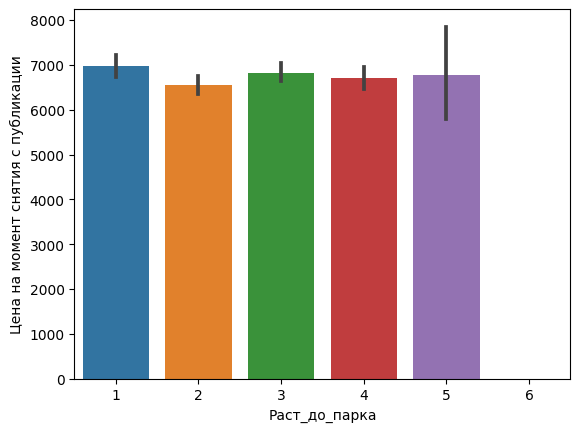

In [232]:
sb.barplot(df1, x='Раст_до_парка',  y='Цена на момент снятия с публикации', order=["1", "2", "3", "4", "5", "6"])
# на графике не наблюдается корреляций, поэтому этот параметр не будем использовать в расчете Стоимости квартиры

**17)'Число водоёмов в радиусе 3 км'**

<Axes: xlabel='Число водоёмов в радиусе 3 км', ylabel='Цена на момент снятия с публикации'>

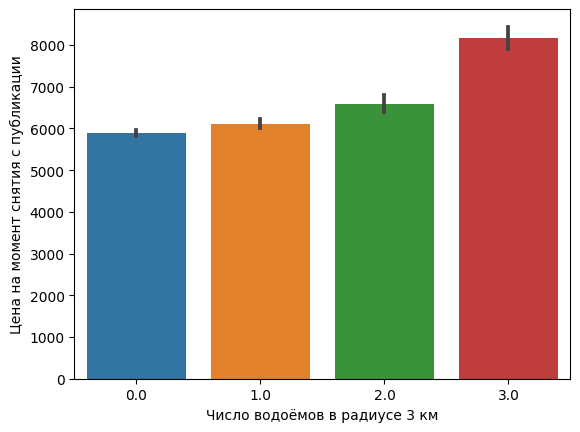

In [233]:
sb.barplot(df1, x='Число водоёмов в радиусе 3 км',  y='Цена на момент снятия с публикации')
# на графике видна небольшая корреляция при росте числа водоёмов растет цена

In [234]:
# найдем коэффициент, при котором увеличивается цена квартиры при разных количествах водоемов от средней цены
def ms(df):
  V_0 = df[df['Число водоёмов в радиусе 3 км']== 0]['Цена на момент снятия с публикации'].mean()
  V_1 = df[df['Число водоёмов в радиусе 3 км']== 1]['Цена на момент снятия с публикации'].mean()
  V_2 = df[df['Число водоёмов в радиусе 3 км']== 2]['Цена на момент снятия с публикации'].mean()
  V_3 = df[df['Число водоёмов в радиусе 3 км']== 3]['Цена на момент снятия с публикации'].mean()
  V_0_coeffic = (V_0/Average_price)
  V_1_coeffic = (V_1/Average_price)
  V_2_coeffic = (V_2/Average_price)
  V_3_coeffic = (V_3/Average_price)
  print("V_0_coeffic =", V_0_coeffic, "V_1_coeffic =", V_1_coeffic, "V_2_coeffic =", V_2_coeffic,"V_3_coeffic =", V_3_coeffic)

In [235]:
ms(df1)

V_0_coeffic = 1.0576239836256138 V_1_coeffic = 1.0974935070448326 V_2_coeffic = 1.1839979808187409 V_3_coeffic = 1.4686806353441249


**18) 'Расстояние до ближайшего водоёма (м)**

<Axes: xlabel='Расстояние до ближайшего водоёма (м)', ylabel='Цена на момент снятия с публикации'>

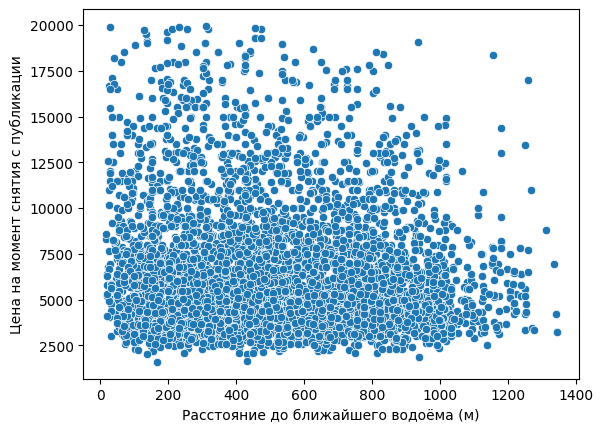

In [236]:
sb.scatterplot(df1, x='Расстояние до ближайшего водоёма (м)',  y='Цена на момент снятия с публикации')
# на графике четкой корреляции не наблюдается, поэтому разделим на столбец 'Расстояние до ближайшего водоёма' на группы по 200 м

In [237]:
df1['Раст_до_вод_кат'] = Series()
df1.loc[df['Расстояние до ближайшего водоёма (м)'] < 200, 'Раст_до_вод_кат'] = '1'
df1.loc[(df['Расстояние до ближайшего водоёма (м)'] >= 200) & (df1['Расстояние до ближайшего водоёма (м)'] <= 400), 'Раст_до_вод_кат'] = "2"
df1.loc[(df['Расстояние до ближайшего водоёма (м)'] >= 400) & (df1['Расстояние до ближайшего водоёма (м)'] <= 600), 'Раст_до_вод_кат'] = "3"
df1.loc[(df['Расстояние до ближайшего водоёма (м)'] >= 600) & (df1['Расстояние до ближайшего водоёма (м)'] <= 800), 'Раст_до_вод_кат'] = "4"
df1.loc[(df['Расстояние до ближайшего водоёма (м)'] >= 800) & (df1['Расстояние до ближайшего водоёма (м)'] <= 1000), 'Раст_до_вод_кат'] = "5"
df1.loc[(df['Расстояние до ближайшего водоёма (м)'] >= 1000) & (df1['Расстояние до ближайшего водоёма (м)'] <= 1400), 'Раст_до_вод_кат'] = "6"

<ipython-input-237-deb09aaa994a>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1['Раст_до_вод_кат'] = Series()
<ipython-input-237-deb09aaa994a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Раст_до_вод_кат'] = Series()


<Axes: xlabel='Раст_до_вод_кат', ylabel='Цена на момент снятия с публикации'>

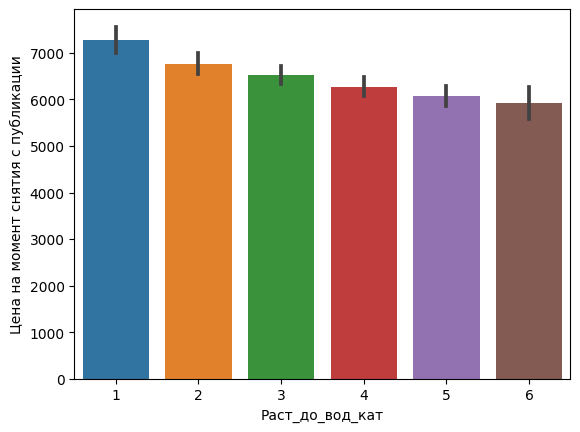

In [238]:
sb.barplot(df1, x='Раст_до_вод_кат',  y='Цена на момент снятия с публикации', order=["1", "2", "3", "4", "5", "6"])
# на графике видна небольшая отрицательная корреляция при росте числа водоёма растет цена

In [239]:
# найдем коэффициенты
def R_V(df):
  V_1 = df[df['Раст_до_вод_кат']== '1']['Цена на момент снятия с публикации'].mean()
  V_2 = df[df['Раст_до_вод_кат']== '2']['Цена на момент снятия с публикации'].mean()
  V_3 = df[df['Раст_до_вод_кат']== '3']['Цена на момент снятия с публикации'].mean()
  V_4 = df[df['Раст_до_вод_кат']== '4']['Цена на момент снятия с публикации'].mean()
  V_5 = df[df['Раст_до_вод_кат']== '5']['Цена на момент снятия с публикации'].mean()
  V_6 = df[df['Раст_до_вод_кат']== '6']['Цена на момент снятия с публикации'].mean()
  V_1_coeffic = (V_1/Average_price)
  V_2_coeffic = (V_2/Average_price)
  V_3_coeffic = (V_3/Average_price)
  V_4_coeffic = (V_4/Average_price)
  V_5_coeffic = (V_5/Average_price)
  V_6_coeffic = (V_6/Average_price)
  print("V_1_coeffic =", V_1_coeffic, "V_2_coeffic =", V_2_coeffic,"V_3_coeffic =", V_3_coeffic, "V_4_coeffic =", V_4_coeffic, "V_5_coeffic =", V_5_coeffic, "V_6_coeffic =", V_6_coeffic)

In [240]:
R_V(df1)

V_1_coeffic = 1.3074346709220142 V_2_coeffic = 1.215616631671047 V_3_coeffic = 1.1707811150830254 V_4_coeffic = 1.126458995708383 V_5_coeffic = 1.0912927228678142 V_6_coeffic = 1.0621357937154858


# **Выводы:**

Моя гиппотеза о корреляции всех признаков с Ценой квартиры, подтвердилась а именно:

1) цена **сильно** зависит от таких параметров:
*   Площадь квартиры (в свою очередь площадь квартиры сильно зависит от жилой площади, числа комнат, площади кухни, высоты потолков)
*   Число комнат
*   Высота потолков
*   Жилая площадь
*   Площадь кухни
*   если квартира является Апартаментами
*   если квартира является Квартирой-студией
*   квартира имеет Свободную планировку


2) цена **не сильно** зависит (но все же есть) от таких параметров:

*   Всего этажей в доме
*   Этаж
*   Число балконов
*   Расстояние до ближайшего аэропорта(м)
*   Расстояние до центра города (м)
*   Число парков в радиусе 3 км'
*   Число водоёмов в радиусе 3 км
*   Расстояние до ближайшего водоёма

Для подтверждения моего вывода построем карту корреляций по всем признакам.















# **3. Многомерный анализ**

In [296]:
# удалим столбцы 'Квартира-студия (булев тип)', 'Свободная планировка (булев тип) содержащие булевые значения
df1 = df.drop(['Квартира-студия (булев тип)', 'Свободная планировка (булев тип)'], axis= 1 , inplace= True )

<ipython-input-297-1f84476a89e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")


<Axes: >

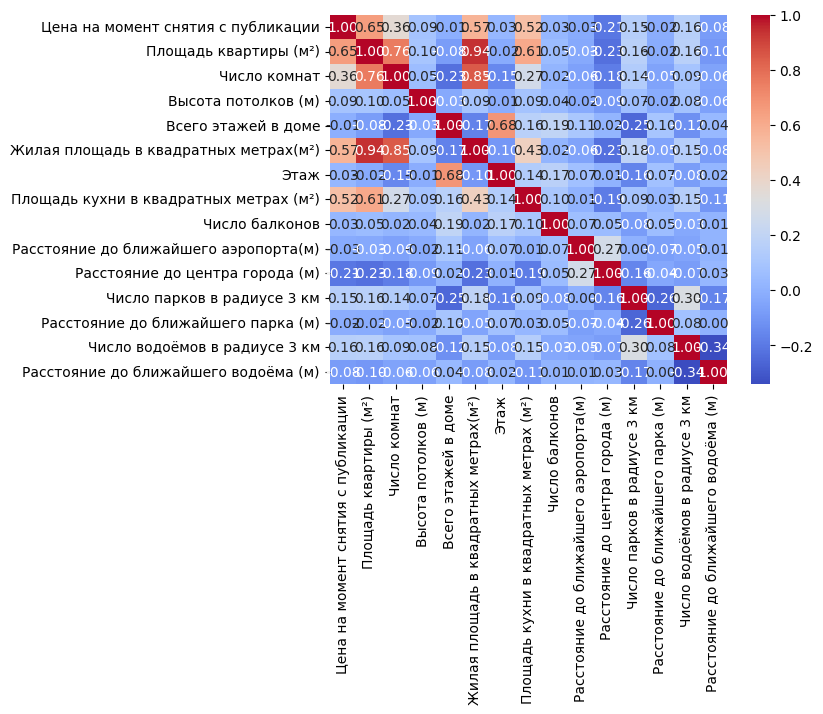

In [297]:
sb.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")

## **3. построим модель для прогнозирования стоимости квартиры**

In [298]:
#  удалим все NaN которые мешают расчетам
df1=df.fillna(0)

In [299]:
# создадим новый df с коэффициентами корреляций  цены (из тепловой карты) от всех параметров
df_corr2 = DataFrame({'Площадь квартиры (м²)': [0.77], 'Число комнат': [0.48], 'Высота потолков (м)': [0.51], 'Всего этажей в доме': [0.17], 'Жилая площадь в квадратных метрах(м²)': [0.64], 'Этаж': [0.12], 'Площадь кухни в квадратных метрах (м²)': [0.58], 'Число балконов': [0.12], 'Расстояние до ближайшего аэропорта(м)': [0.03], 'Расстояние до центра города (м)': [-0.35], 'Число парков в радиусе 3 км': [0.17], 'Расстояние до ближайшего парка (м)': [0.05], 'Число водоёмов в радиусе 3 км': [0.17], 'Расстояние до ближайшего водоёма (м)': [0.13]})
df_corr2

,Площадь квартиры (м²),Число комнат,Высота потолков (м),Всего этажей в доме,Жилая площадь в квадратных метрах(м²),Этаж,Площадь кухни в квадратных метрах (м²),Число балконов,Расстояние до ближайшего аэропорта(м),Расстояние до центра города (м),Число парков в радиусе 3 км,Расстояние до ближайшего парка (м),Число водоёмов в радиусе 3 км,Расстояние до ближайшего водоёма (м)
0,0.77,0.48,0.51,0.17,0.64,0.12,0.58,0.12,0.03,-0.35,0.17,0.05,0.17,0.13


In [300]:
# переведем коэффициенты корреляции (из тепловой карты) в доли
df_corr2['Sum'] = df_corr2[['Площадь квартиры (м²)', 'Число комнат', 'Высота потолков (м)', 'Всего этажей в доме', 'Жилая площадь в квадратных метрах(м²)', 'Этаж', 'Площадь кухни в квадратных метрах (м²)', 'Число балконов', 'Расстояние до ближайшего аэропорта(м)', 'Расстояние до центра города (м)', 'Число парков в радиусе 3 км', 'Расстояние до ближайшего парка (м)', 'Число водоёмов в радиусе 3 км', 'Расстояние до ближайшего водоёма (м)']].sum(axis=1)
x = 1/df_corr2['Sum']
x

0    0.278552
Name: Sum, dtype: float64

In [301]:
g = df_corr2[['Площадь квартиры (м²)', 'Число комнат', 'Высота потолков (м)', 'Всего этажей в доме', 'Жилая площадь в квадратных метрах(м²)', 'Этаж', 'Площадь кухни в квадратных метрах (м²)', 'Число балконов', 'Расстояние до ближайшего аэропорта(м)', 'Расстояние до центра города (м)', 'Число парков в радиусе 3 км', 'Расстояние до ближайшего парка (м)', 'Число водоёмов в радиусе 3 км', 'Расстояние до ближайшего водоёма (м)']].sum(axis=1)
#x = 1/g
x = 0.278552
df_corr3 = df_corr2 * x
df_corr3

,Площадь квартиры (м²),Число комнат,Высота потолков (м),Всего этажей в доме,Жилая площадь в квадратных метрах(м²),Этаж,Площадь кухни в квадратных метрах (м²),Число балконов,Расстояние до ближайшего аэропорта(м),Расстояние до центра города (м),Число парков в радиусе 3 км,Расстояние до ближайшего парка (м),Число водоёмов в радиусе 3 км,Расстояние до ближайшего водоёма (м),Sum
0,0.214485,0.133705,0.142062,0.047354,0.178273,0.033426,0.16156,0.033426,0.008357,-0.097493,0.047354,0.013928,0.047354,0.036212,1.000002


Объявим итоговую формулу расчета,

где df_input это исходный df,

df_corr это расчитанный df на основе тепловой карты, и переведенный в доли

df_fact это фактический Датафрейм, стоимость которого необходимо расчитать

In [302]:
def coast (df_input,df_corr,df_fact):
  #временный df для средних значений
  df_sred=df_input.mean()
  #по-умолчанию коэффициент равен отношению фактического значения параметра к среднему значению этого параметра (коэфициент среднего)
  df3=df_fact/df_sred

  #скорректируем часть коэффициентов исходя из проведенного анализа
  #уберем из формулы рассчета из-за отсутсвии кореляции
  df3['Расстояние до ближайшего парка (м)']=0
  #ЧИСЛО КОМНАТ
  df3['Число комнат']=df_input[df_input['Число комнат']== df_fact['Число комнат'].iloc[0]]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  #ВСЕГО ЭТАЖЕЙ В ДОМЕ
  if df_fact['Всего этажей в доме'].iloc[0]<=2:
    df3['Всего этажей в доме']=df_input[df_input['Всего этажей в доме']<= 2]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Всего этажей в доме'].iloc[0]>2 and df_fact['Всего этажей в доме'].iloc[0]<=6:
    df3['Всего этажей в доме']=df_input[( df_input['Всего этажей в доме']>2 ) & ( df_input['Всего этажей в доме']<=6 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Всего этажей в доме'].iloc[0]>6 and df_fact['Всего этажей в доме'].iloc[0]<=12:
    df3['Всего этажей в доме']=df_input[( df_input['Всего этажей в доме']>6 ) & ( df_input['Всего этажей в доме']<=12 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Всего этажей в доме'].iloc[0]>12 and df_fact['Всего этажей в доме'].iloc[0]<=15:
    df3['Всего этажей в доме']=df_input[( df_input['Всего этажей в доме']>12 ) & ( df_input['Всего этажей в доме']<=15 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Всего этажей в доме'].iloc[0]>15:
    df3['Всего этажей в доме']=df_input[df_input['Всего этажей в доме']> 15]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  #ЭТАЖ
  if df_fact['Этаж'].iloc[0]<=5:
    df3['Этаж']=df_input[df_input['Этаж']<= 5]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Этаж'].iloc[0]>5 and df_fact['Этаж'].iloc[0]<=10:
    df3['Этаж']=df_input[( df_input['Этаж']>5 ) & ( df_input['Этаж']<=10 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Этаж'].iloc[0]>10 and df_fact['Этаж'].iloc[0]<=15:
    df3['Этаж']=df_input[( df_input['Этаж']>10 ) & ( df_input['Этаж']<=15 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Этаж'].iloc[0]>15 and df_fact['Этаж'].iloc[0]<=20:
    df3['Этаж']=df_input[( df_input['Этаж']>15 ) & ( df_input['Этаж']<=20 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Этаж'].iloc[0]>20:
    df3['Этаж']=df_input[df_input['Этаж']> 20]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  #ЧИСЛО БАЛКОНОВ
  df3['Число балконов']=df_input[df_input['Число балконов']== df_fact['Число балконов'].iloc[0]]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  #Растояние до аэропорта
  if df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]<=10000:
    df3['Расстояние до ближайшего аэропорта(м)']=df_input[df_input['Расстояние до ближайшего аэропорта(м)']<= 10000]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]>10000 and df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]<=20000:
    df3['Расстояние до ближайшего аэропорта(м)']=df_input[( df_input['Расстояние до ближайшего аэропорта(м)']>10000 ) & ( df_input['Расстояние до ближайшего аэропорта(м)']<=20000 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]>20000 and df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]<=30000:
    df3['Расстояние до ближайшего аэропорта(м)']=df_input[( df_input['Расстояние до ближайшего аэропорта(м)']>20000 ) & ( df_input['Расстояние до ближайшего аэропорта(м)']<=30000 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]>30000 and df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]<=4000:
    df3['Расстояние до ближайшего аэропорта(м)']=df_input[( df_input['Расстояние до ближайшего аэропорта(м)']>30000 ) & ( df_input['Расстояние до ближайшего аэропорта(м)']<=40000 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]>40000 and df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]<=6000:
    df3['Расстояние до ближайшего аэропорта(м)']=df_input[( df_input['Расстояние до ближайшего аэропорта(м)']>40000 ) & ( df_input['Расстояние до ближайшего аэропорта(м)']<=60000 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего аэропорта(м)'].iloc[0]>60000:
    df3['Расстояние до ближайшего аэропорта(м)']=df_input[df_input['Расстояние до ближайшего аэропорта(м)']>60000]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  #Расстояние до центра города (м)
  if df_fact['Расстояние до центра города (м)'].iloc[0]<=10000:
    df3['Расстояние до центра города (м)']=df_input[df_input['Расстояние до центра города (м)']<= 10000]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до центра города (м)'].iloc[0]>10000 and df_fact['Расстояние до центра города (м)'].iloc[0]<=20000:
    df3['Расстояние до центра города (м)']=df_input[( df_input['Расстояние до центра города (м)']>10000 ) & ( df_input['Расстояние до центра города (м)']<=20000 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до центра города (м)'].iloc[0]>20000 and df_fact['Расстояние до центра города (м)'].iloc[0]<=30000:
    df3['Расстояние до центра города (м)']=df_input[( df_input['Расстояние до центра города (м)']>20000 ) & ( df_input['Расстояние до центра города (м)']<=30000 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до центра города (м)'].iloc[0]>30000 and df_fact['Расстояние до центра города (м)'].iloc[0]<=4000:
    df3['Расстояние до центра города (м)']=df_input[( df_input['Расстояние до центра города (м)']>30000 ) & ( df_input['Расстояние до центра города (м)']<=40000 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до центра города (м)'].iloc[0]>40000 and df_fact['Расстояние до центра города (м)'].iloc[0]<=6000:
    df3['Расстояние до центра города (м)']=df_input[( df_input['Расстояние до центра города (м)']>40000 ) & ( df_input['Расстояние до центра города (м)']<=60000 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до центра города (м)'].iloc[0]>60000:
    df3['Расстояние до центра города (м)']=df_input[df_input['Расстояние до центра города (м)']>60000]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  #Число парков в радиусе 3 км
  df3['Число парков в радиусе 3 км']=df_input[df_input['Число парков в радиусе 3 км']== df_fact['Число парков в радиусе 3 км'].iloc[0]]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  #Число водоёмов в радиусе 3 км
  df3['Число водоёмов в радиусе 3 км']=df_input[df_input['Число водоёмов в радиусе 3 км']== df_fact['Число водоёмов в радиусе 3 км'].iloc[0]]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  #Расстояние до ближайшего водоёма (м)
  if df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]<=200:
    df3['Расстояние до ближайшего водоёма (м)']=df_input[df_input['Расстояние до ближайшего водоёма (м)']<= 200]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]>200 and df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]<=400:
    df3['Расстояние до ближайшего водоёма (м)']=df_input[( df_input['Расстояние до ближайшего водоёма (м)']>200 ) & ( df_input['Расстояние до ближайшего водоёма (м)']<=400 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]>400 and df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]<=600:
    df3['Расстояние до ближайшего водоёма (м)']=df_input[( df_input['Расстояние до ближайшего водоёма (м)']>400 ) & ( df_input['Расстояние до ближайшего водоёма (м)']<=600 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]>600 and df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]<=800:
    df3['Расстояние до ближайшего водоёма (м)']=df_input[( df_input['Расстояние до ближайшего водоёма (м)']>600 ) & ( df_input['Расстояние до ближайшего водоёма (м)']<=800 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]>800 and df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]<=1000:
    df3['Расстояние до ближайшего водоёма (м)']=df_input[( df_input['Расстояние до ближайшего водоёма (м)']>800 ) & ( df_input['Расстояние до ближайшего водоёма (м)']<=1000 ) ]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']
  if df_fact['Расстояние до ближайшего водоёма (м)'].iloc[0]>1000:
    df3['Расстояние до ближайшего водоёма (м)']=df_input[df_input['Расстояние до ближайшего водоёма (м)']>1000]['Цена на момент снятия с публикации'].mean()/df_sred['Цена на момент снятия с публикации']

# расчет цены среднего 1м2 площади квартиры
  sred_metr_coast=df_sred['Цена на момент снятия с публикации']/df_sred['Площадь квартиры (м²)']

# базовая стоимость это цены среднего 1м2 * фактическую площадь квартиры
  base_coast=sred_metr_coast*df_fact['Площадь квартиры (м²)']

  # Итоговая формула расчета:
  # Цена квартиры = Базовая стоимость + (1 коэфициент среднего * среднюю цену квартиры *  1 долевой коэффициент корреляции)+(2 коэфициент среднего * среднюю цену квартиры *2 долевой коэффициент корреляции)+
  #(N коэфициент среднего * среднюю цену квартиры * N долевой коэффициент корреляции)

  df5=base_coast+\
     (df3['Площадь квартиры (м²)']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Площадь квартиры (м²)'].iloc[0]+\
     (df3['Высота потолков (м)']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Высота потолков (м)'].iloc[0]+\
     (df3['Всего этажей в доме']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Всего этажей в доме'].iloc[0]+\
     (df3['Жилая площадь в квадратных метрах(м²)']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Жилая площадь в квадратных метрах(м²)'].iloc[0]+\
     (df3['Площадь кухни в квадратных метрах (м²)']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Площадь кухни в квадратных метрах (м²)'].iloc[0]+\
     (df3['Число балконов']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Число балконов'].iloc[0]+\
     (df3['Расстояние до ближайшего аэропорта(м)']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Расстояние до ближайшего аэропорта(м)'].iloc[0]+\
     (df3['Расстояние до центра города (м)']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Расстояние до центра города (м)'].iloc[0]+\
     (df3['Число парков в радиусе 3 км']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Число парков в радиусе 3 км'].iloc[0]+\
     (df3['Число водоёмов в радиусе 3 км']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Число водоёмов в радиусе 3 км'].iloc[0]+\
     (df3['Расстояние до ближайшего водоёма (м)']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Расстояние до ближайшего водоёма (м)'].iloc[0]+\
     (df3['Расстояние до ближайшего парка (м)']*df_sred['Цена на момент снятия с публикации']-df_sred['Цена на момент снятия с публикации'])*df_corr['Расстояние до ближайшего парка (м)'].iloc[0]
  result=df5
  return (result)

In [303]:
# запустим функцию расчета
#  в качестве входных данных берем исходный датафрейм, подставляем расчитанный ранее долевые коэффициенты корреляции,
# в качестве данных для расчета используем тот же самый датафрейм (но можно использовать любые другие данные)
# полученные результаты добавим в исходный датафрейм в виде нового столбца - Расчитанная цена
result_list=coast (df1,df_corr3,df1)
df1['Рассчитанная цена (тыс. рублей)']=result_list

In [304]:
df1.head(10)

,Цена на момент снятия с публикации,Площадь квартиры (м²),Число комнат,Высота потолков (м),Всего этажей в доме,Жилая площадь в квадратных метрах(м²),Этаж,Апартаменты (булев тип),Площадь кухни в квадратных метрах (м²),Число балконов,Расстояние до ближайшего аэропорта(м),Расстояние до центра города (м),Число парков в радиусе 3 км,Расстояние до ближайшего парка (м),Число водоёмов в радиусе 3 км,Расстояние до ближайшего водоёма (м),Рассчитанная цена (тыс. рублей)
0,13000.0,108,3,2.70,16.0,51.00,8,0,25.00,0.0,18863.0,16028.0,1.0,482.0,2.0,755.0,16073.942550
1,3350.0,40,1,0.00,11.0,18.60,1,0,11.00,2.0,12817.0,18603.0,0.0,0.0,0.0,0.0,2867.676344
2,5196.0,56,2,0.00,5.0,34.30,4,0,8.30,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,5261.093355
3,64900.0,159,3,0.00,14.0,0.00,9,0,0.00,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,16691.840244
4,10000.0,100,2,3.03,14.0,32.00,13,0,41.00,0.0,31856.0,8098.0,2.0,112.0,1.0,48.0,16268.306611
5,2890.0,30,1,0.00,12.0,14.40,5,0,9.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1181.478388
6,3700.0,37,1,0.00,26.0,10.60,6,0,14.40,1.0,52996.0,19143.0,0.0,0.0,0.0,0.0,2552.950280
7,7915.0,71,2,0.00,24.0,0.00,22,0,18.90,2.0,23982.0,11634.0,0.0,0.0,0.0,0.0,7153.649952
8,2900.0,33,1,0.00,27.0,15.43,26,0,8.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1583.741388
9,5400.0,61,3,2.50,9.0,43.60,7,0,6.50,2.0,50898.0,15008.0,0.0,0.0,0.0,0.0,7434.704179


<Axes: >

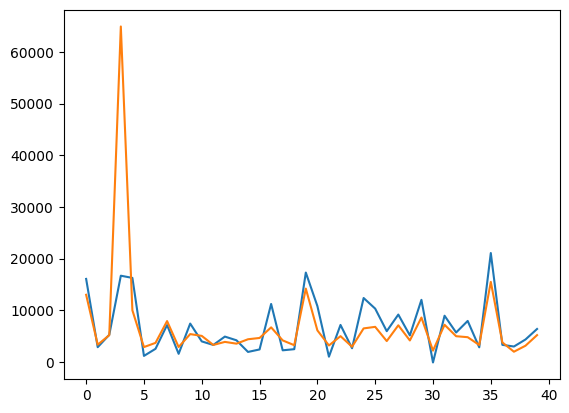

In [306]:
df1['Рассчитанная цена (тыс. рублей)'].head(40).plot()
df1['Цена на момент снятия с публикации'].head(40).plot()

# построим график по полученным данным, и сравним их с исходной ценой
# полученный график подтверждает, правильность полученных расчетов, с небольшой погрешностью